In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\Moitree\Downloads\spam detection in email\spam.csv")  


In [3]:
# Step 3: Clean and prepare the dataset
df = df[['Category', 'Message']]
df.dropna(inplace=True)  # remove rows with missing values
df['Message']=df['Message'].astype(str)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})  # encode labels
df.rename(columns={'Category': 'label', 'Message': 'message'}, inplace=True)



In [4]:
#  Split data
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
#  Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
# Step 6: Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [7]:
# Step 7: Make predictions
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)[:, 1]  # probability for class 1 (spam)


In [8]:
print("Classification Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

Classification Metrics
Accuracy: 96.95067264573991

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



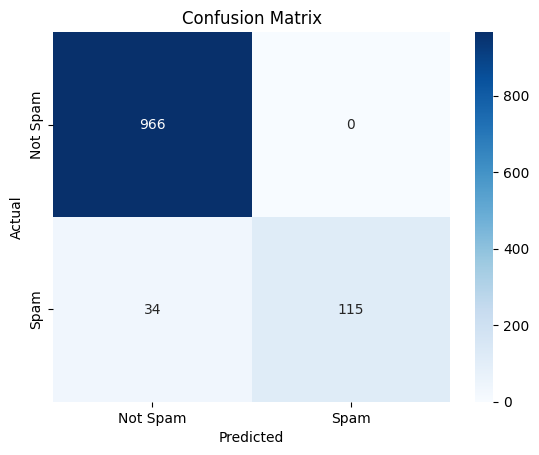

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
#  Evaluate with regression metrics
print("\n Regression Metrics (on spam probability):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_proba))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_proba))
print("Root MSE (RMSE):", np.sqrt(mean_squared_error(y_test, y_proba)))
print("R2 Score:", r2_score(y_test, y_proba))



 Regression Metrics (on spam probability):
Mean Absolute Error (MAE): 0.06419901937318047
Mean Squared Error (MSE): 0.02479247969264272
Root MSE (RMSE): 0.15745627867012074
R2 Score: 0.7858558049808541


In [34]:
import joblib
joblib.dump(model, "spam_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("\n Model and vectorizer saved successfully")


 Model and vectorizer saved successfully


In [ ]:
#  User input prediction
def classify_message(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0][1]
    label = "Spam" if pred == 1 else "Not Spam"
    print(f"\nUser Message: {text}")
    print(f"Prediction: {label}")
    print(f"Spam Probability: {prob:.2f}")


In [32]:
# Example usage
user_message = "Congratulations! You've won a free prize. Click here to claim."
classify_message(user_message)


User Message: Congratulations! You've won a free prize. Click here to claim.
Prediction: Spam
Spam Probability: 0.84
